# 02 - Data Augmentation

In this notebook, we expand our dataset using **data augmentation**. This process artificially increases the size and diversity of our training data by applying random transformations (like rotation, flipping, and color shifts) to the existing images. 

**Benefits of Data Augmentation:**
- Increases the amount of training data without collecting new images.
- Helps the model become more robust and generalize better to unseen data.
- Reduces overfitting by exposing the model to a wider variety of image variations.

**Process:**
1. **Input:** Raw images from `data/raw/train/` (generated by `01_data_collection.ipynb`).
2. **Logic:** The augmentation script is defined in `scripts/data_augmentation.py`.
3. **Output:** The original and newly augmented images are saved to `data/augmented/train/`.

## 1. Setup

First, let's import the necessary libraries and our custom augmentation script.

In [2]:
import os
import sys
import random
import matplotlib.pyplot as plt
from PIL import Image

# Import the custom augmentation function
from scripts.data_augmentation import augment_dataset


## 2. Configuration

We'll define the paths for our source and destination directories and specify how many augmented versions to create for each original image. Keeping these parameters in one place makes them easy to adjust.

In [3]:
# --- Parameters ---
RAW_DATA_DIR = 'data/raw/train/'
AUGMENTED_DATA_DIR = 'data/augmented/train/'
AUGMENTATIONS_PER_IMAGE = 3

# --- Path Validation ---
# Check if the raw data directory exists before proceeding.
if not os.path.exists(RAW_DATA_DIR):
    print(f"❌ Error: Raw data directory '{RAW_DATA_DIR}' not found.")
    print("Please ensure you have run '01_data_collection.ipynb' first.")
else:
    print(f"✅ Found raw data at: {RAW_DATA_DIR}")
    print(f"   Augmented data will be saved to: {AUGMENTED_DATA_DIR}")
    print(f"   Number of augmentations per image: {AUGMENTATIONS_PER_IMAGE}")


✅ Found raw data at: data/raw/train/
   Augmented data will be saved to: data/augmented/train/
   Number of augmentations per image: 3


## 3. Run the Augmentation Process

Now, we execute the main function. This will iterate through each image in the raw dataset, apply a series of random transformations, and save both the original and the new images to the augmented data directory.

> *Note: This process may take some time depending on the size of your dataset and the number of augmentations per image.*

In [4]:
# Ensure the raw data directory exists before running
if os.path.exists(RAW_DATA_DIR):
    print("🚀 Starting data augmentation...")
    augment_dataset(
        input_dir=RAW_DATA_DIR,
        output_dir=AUGMENTED_DATA_DIR,
        augmentations_per_image=AUGMENTATIONS_PER_IMAGE
    )
    print("\n🎉 Data augmentation completed successfully!")
else:
    print("Skipping augmentation process due to missing raw data directory.")


🚀 Starting data augmentation...


/Users/owen/Code/DL Assignment 1/DASC7606A-B/.venv/lib/python3.9/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
INFO:scripts.data_augmentation:Found 50000 images to augment.
INFO:scripts.data_augmentation:Augmentation of 150000 images completed. Output saved to: data/augmented/train/



🎉 Data augmentation completed successfully!


## 4. Visualize and Verify the Results

It's essential to visually inspect the output to ensure the augmentations are reasonable and haven't distorted the images beyond recognition. We'll define a helper function and then use it to display an original image alongside its newly generated counterparts.

In [5]:
def visualize_augmentations(original_path, augmented_paths, class_name):
    """
    Visualizes an original image and its augmented versions in a single row.

    Args:
        original_path (str): The file path to the original image.
        augmented_paths (list): A list of file paths to the augmented images.
        class_name (str): The name of the image class for titles.
    """
    num_images = len(augmented_paths) + 1
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 4, 4))

    # Display Original Image
    try:
        orig_img = Image.open(original_path)
        axes[0].imshow(orig_img)
        axes[0].set_title(f'Original\n({class_name})')
        axes[0].axis('off')
    except FileNotFoundError:
        axes[0].set_title(f'Original Image Not Found')
        axes[0].axis('off')

    # Display Augmented Images
    for i, aug_path in enumerate(augmented_paths):
        try:
            aug_img = Image.open(aug_path)
            axes[i+1].imshow(aug_img)
            axes[i+1].set_title(f'Augmented {i+1}')
            axes[i+1].axis('off')
        except FileNotFoundError:
            axes[i+1].set_title(f'Augmented Image Not Found')
            axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()


Visualizing augmentations for a random image from class: 'dog'


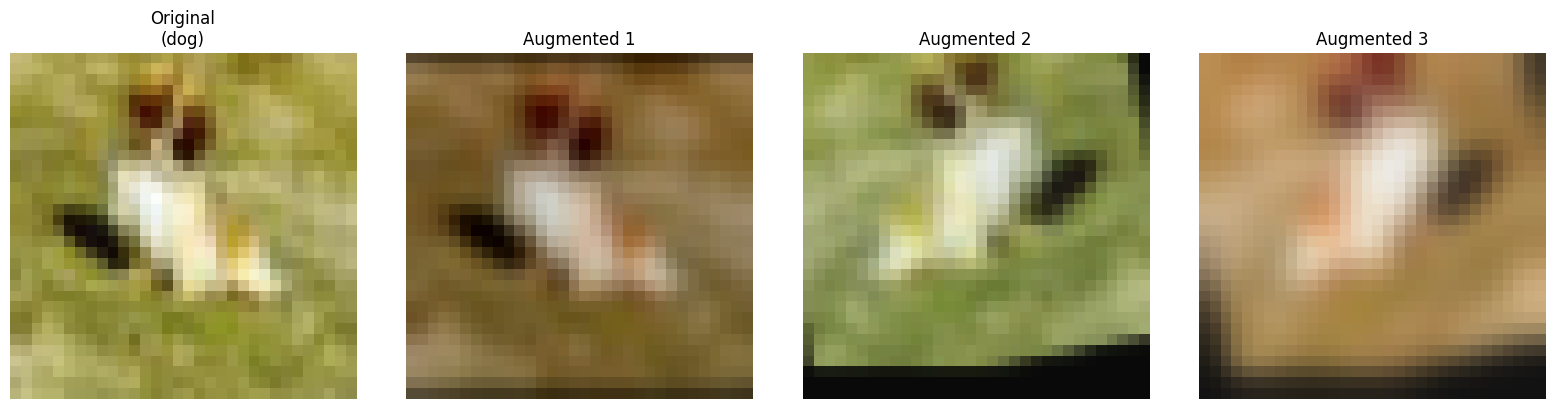

In [6]:
# --- Select a Random Image to Visualize ---
if os.path.exists(AUGMENTED_DATA_DIR):
    # Get a list of class directories
    classes = [d for d in os.listdir(AUGMENTED_DATA_DIR) if os.path.isdir(os.path.join(AUGMENTED_DATA_DIR, d))]

    if not classes:
        print(f"No class subdirectories found in '{AUGMENTED_DATA_DIR}'.")
    else:
        # Pick a random class and list its files
        class_name = random.choice(classes)
        class_dir = os.path.join(AUGMENTED_DATA_DIR, class_name)
        files = os.listdir(class_dir)

        # Find an original image file (prefixed with 'orig_')
        orig_files = [f for f in files if f.startswith('orig_')]

        if not orig_files:
            print(f"No original images found in class directory: {class_dir}")
        else:
            # Select a random original image and find its corresponding augmentations
            random_orig_filename = random.choice(orig_files)
            original_path = os.path.join(class_dir, random_orig_filename)

            # Extract the base name (e.g., 'image_001.jpg' from 'orig_image_001.jpg')
            base_name = random_orig_filename.replace('orig_', '')
            base_name_without_ext = os.path.splitext(base_name)[0]

            # Find all augmented files that were generated from this original image
            augmented_paths = sorted([
                os.path.join(class_dir, f)
                for f in files if f.startswith('aug_') and base_name_without_ext in f
            ])

            print(f"Visualizing augmentations for a random image from class: '{class_name}'")
            visualize_augmentations(original_path, augmented_paths, class_name)
else:
    print(f"Skipping visualization because the augmented data directory '{AUGMENTED_DATA_DIR}' does not exist.")
